In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics

import statsmodels.api as sm

Text(0.5,1,'Logistic Function')

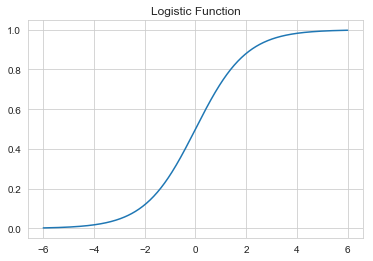

In [4]:
# ロジスティック関数
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t))

# tを-6から6まで500点用意
t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title('Logistic Function')

In [5]:
df = sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
# 不倫の有無を0,1で表す新しい列'Had_Affair'を作る
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
    
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [8]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [10]:
# 不倫の有無でグループ分けして、平均する
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


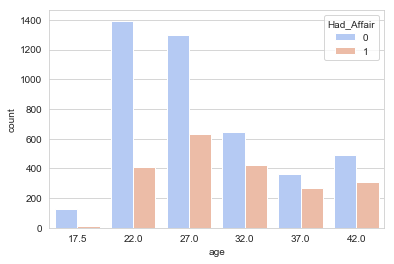

In [12]:
# 年齢分布
sns.countplot('age',data=df.sort_values('age'),hue='Had_Affair',palette='coolwarm')

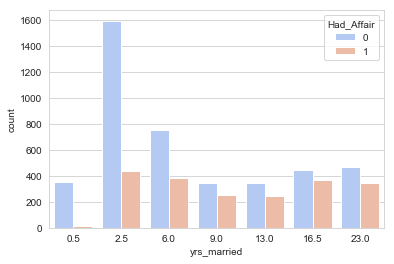

In [14]:
# 結婚年月
sns.countplot('yrs_married',data=df.sort_values('yrs_married'),hue='Had_Affair',palette='coolwarm')

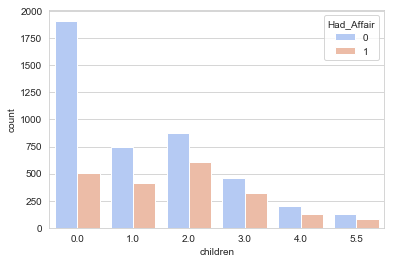

In [16]:
# 子供の数
sns.countplot('children',data=df.sort_values('children'),hue='Had_Affair',palette='coolwarm')

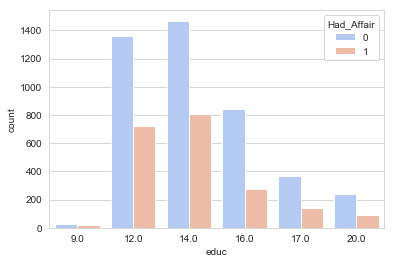

In [17]:
# 学歴
sns.countplot('educ',data=df.sort_values('educ'),hue='Had_Affair',palette='coolwarm')

In [20]:
# カテゴリーを表す変数をダミー変数化する
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [22]:
# 列名を付ける
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [23]:
# 不要な列を削除して説明変数を作る
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [24]:
# ダミー変数をまとめる
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [25]:
# 説明変数XのDataFrame
X = pd.concat([X,dummies],axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [26]:
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [27]:
# 多重共線性を排除
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

X = X.drop('affairs',axis=1)


X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [29]:
# Yを一次元のArrayにする
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
# X,Yでモデルを作り、X.Yでモデルの精度を取得
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.7258875274897895

In [32]:
Y.mean()

0.3224945020420987

In [38]:
# 変数名とその係数を格納するDataFrame作成
coeff_df = DataFrame([X.columns,log_model.coef_[0]]).T

In [39]:
coeff_df

,0,1
0,rate_marriage,-0.697846
1,age,-0.0563363
2,yrs_married,0.103893
3,children,0.0181853
4,religious,-0.368507
5,educ,0.00864737
6,occ2,0.298119
7,occ3,0.60815
8,occ4,0.346511
9,occ5,0.94226


In [41]:
# 学習用データのみでモデル作成
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# テストデータを用いて予測
class_predict = log_model2.predict(X_test)

# 精度を計算
print(metrics.accuracy_score(Y_test,class_predict))

0.7261306532663316
